# __Toy example of a two-arm ConvNet and diagnostics using gradCAM__

In order to diminish the influence of colour on its classification accuracy, a small ConvNet will be endowed with a second arm in which the RGB-channels have been collapsed by means of 1x1 convolutions. 
Both arms will then be merged together for classification.
Finally, the individual contribution of the two arms will be assessed with the help of [__GradCAM__](https://arxiv.org/abs/1610.02391) . 

In [1]:
import keras
keras.__version__
import os, shutil

Using TensorFlow backend.


#### Paths

In [ ]:
#Pfade
#------

#Basis-Pfad
base_dir = 'C:/Users/saturn/Documents/DataScience/Deep_Learning/Cats_vs_dogs/cats_and_dogs_small'


# Ordner für Training
# Validierung und Test
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#### Imports

In [3]:
# Import Keras Module
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate

#### Input

In [4]:
#Input
bild = Input(shape=(150,150,3))

#### First arm: RGB

In [5]:
#Erster Strang: ConvNet RGB
    
conv_1_1 = Conv2D(32, kernel_size= (3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(bild)
pool_1_1 = MaxPooling2D(pool_size=(2, 2))(conv_1_1)
conv_1_2 = Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_1_1)
pool_1_2 = MaxPooling2D(pool_size=(2, 2))(conv_1_2)
conv_1_3 = Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_1_2)
pool_1_3 = MaxPooling2D(pool_size=(2, 2))(conv_1_3)
conv_1_4 = Conv2D(256, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_1_3)
pool_1_4 = MaxPooling2D(pool_size=(2, 2))(conv_1_4)

#### Second arm: Grayscale (collapsed)

In [6]:
#Zweiter Strang: ConvNet 1 Kanal

conv_2_0 = Conv2D(1, kernel_size= (1,1), activation='relu', kernel_initializer='he_uniform')(bild)
conv_2_1 = Conv2D(32, kernel_size= (3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(conv_2_0)
pool_2_1 = MaxPooling2D(pool_size=(2, 2))(conv_2_1)
conv_2_2 = Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_2_1)
pool_2_2 = MaxPooling2D(pool_size=(2, 2))(conv_2_2)
conv_2_3 = Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_2_2)
pool_2_3 = MaxPooling2D(pool_size=(2, 2))(conv_2_3)
conv_2_4 = Conv2D(256, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_2_3)
pool_2_4 = MaxPooling2D(pool_size=(2, 2))(conv_2_4)

#### Merge both arms

In [7]:
#Beide Straenge werden zusammengefuegt

concat= concatenate([pool_1_4, pool_2_4], axis=-1)
flat= Flatten()(concat)

hidden = Dense(90, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden)

model = Model(inputs=bild, outputs= output)

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

#### Train model

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Validierung und Test ohne Transformationen
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=60,
                              validation_data=validation_generator,
                              validation_steps=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
100/100 [==============================] - 605s 6s/step - loss: 0.7130 - acc: 0.5234 - val_loss: 0.6799 - val_acc: 0.5813
Epoch 2/60
100/100 [==============================] - 597s 6s/step - loss: 0.6741 - acc: 0.5781 - val_loss: 0.6565 - val_acc: 0.6071
Epoch 3/60
100/100 [==============================] - 595s 6s/step - loss: 0.6471 - acc: 0.6128 - val_loss: 0.6357 - val_acc: 0.6109
Epoch 4/60
100/100 [==============================] - 594s 6s/step - loss: 0.6204 - acc: 0.6500 - val_loss: 0.6202 - val_acc: 0.6607
Epoch 5/60
100/100 [==============================] - 592s 6s/step - loss: 0.6000 - acc: 0.6734 - val_loss: 0.5666 - val_acc: 0.7013
Epoch 6/60
100/100 [==============================] - 597s 6s/step - loss: 0.5778 - acc: 0.6941 - val_loss: 0.5783 - val_acc: 0.7031
Epoch 7/60
100/100 [==============================] - 591s 6s/step - loss: 0.5847 - acc: 0.6884 - val_loss: 0.5293 - v

#### Model diagnostics: 
There are signs of overtraining from epoch 30 on.

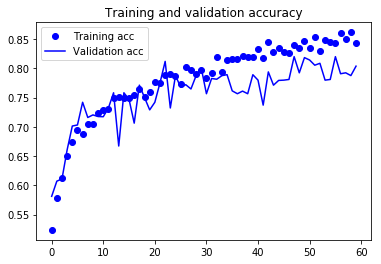

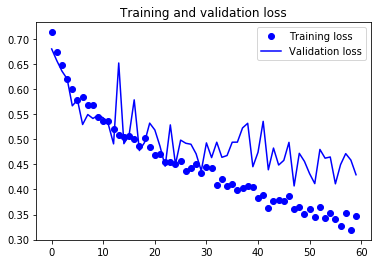

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Pfad zum Testbild
img_path = os.path.join(base_dir, 'Prognose', 'Test_image.jpg')
size = 150

img = image.load_img(img_path, target_size=(size, size))

In [138]:
x = image.img_to_array(img)
print(x.shape)


x = np.expand_dims(x, axis=0)
print(x.shape)

x = preprocess_input(x)

(150, 150, 3)
(1, 150, 150, 3)


## Test picture
The prediction and the contribution of the two arms will be assessed with the following picture:
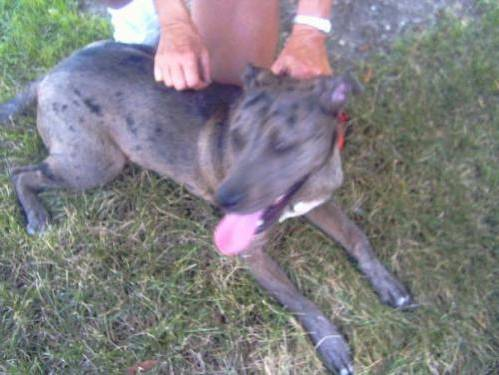

In [139]:
preds = model.predict(x)
print(preds)

[[0.9999964]]


In [140]:
Tier_output = model.output[0]

In [16]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 150, 150, 1)  4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 150, 150, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 150, 150, 32) 320         conv2d_5[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [141]:
last_conv_layer_rgb = model.get_layer('conv2d_4')
last_conv_layer_gs = model.get_layer('conv2d_9')
print(last_conv_layer_rgb.output)

Tensor("conv2d_4/Relu:0", shape=(?, 18, 18, 256), dtype=float32)


####  __GradCAM__

In [142]:
from keras import backend as K

#RGB-Strang
grads_rgb = K.gradients(Tier_output, last_conv_layer_rgb.output)[0]
pooled_grads_rgb = K.mean(grads_rgb, axis=(0, 1, 2))

#GS-Strang
grads_gs = K.gradients(Tier_output, last_conv_layer_gs.output)[0]
pooled_grads_gs = K.mean(grads_gs, axis=(0, 1, 2))


In [153]:

iterate = K.function([model.input], [pooled_grads_rgb, last_conv_layer_rgb.output[0]])

# These are the values of these two quantities, as Numpy arrays,

pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the class
for i in range(256):
    print(conv_layer_output_value[:, :, i])
    print(pooled_grads_value[i])
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

[[4.95281830e+01 0.00000000e+00 2.71693115e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.03510422e+02 1.17155891e+02 7.73468246e+01 1.69798546e+01
  4.18138428e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.31567955e+00
  1.99262581e+01 1.07795858e+00]
 [1.91050278e+02 1.61481796e+02 9.35268784e+01 1.04317673e+02
  1.38690338e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.31545868e+01 2.20432415e+01
  8.04679794e+01 1.13304701e+01]
 [1.42998688e+02 8.93921127e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0

[[ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       

   0.         0.         0.         0.         0.         0.       ]]
4.1700297e-09
[[ 60.43354     0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  4.877221    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.       

    0.           0.           0.        ]]
-6.147404e-09
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           6.4781694
   69.02586     27.554415     0.6734838 ]
 [  0.           0.           0.           0.          22.674452
    0.           0.           0.           0.           0.
    0.           0.           0.          51.876877    28.10134
   54.739624    19.075216     0.        ]
 [  0.           0.          44.090256    25.629902    73.24398
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    3.2768908    0.           0.        ]
 [  0.           0.           0.           0.          19.663536
    7.363392    19.930307     0.    

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[[  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          7.9376507  78.165375   46.84608    19.500044   25.911158 ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.         20.288836   14.602915   54.737373   17.23948    14.093471 ]
 [  0.          0.          0.         47.55705    20.733433   14.845655
    0.          0.         14.081266   37.605843    0.          0.
   18.81404    28.475538   35.44996    48.950462   15.293444    3.4480743]
 [  0.          0.         45.2957     63.769783   89.22422    41.40875
    0.          0.          0.          9.236126   60.29737    83.00437
   71.22686    12.410378    4.6738434   0.          0.          0.       ]
 [  0.          4.478733    0.         33.907726   59.216297   39.88983
   20.808489    0.          0.          0.        115.706955  166.47008
   4

[[ 0.         0.         0.         0.         0.         0.
   0.        27.592224   0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       

[[ 0.          0.          0.          7.9654284   0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.49565694  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [34.089245    0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0

[[ 48.236385   58.15934   102.62586    82.342766   70.13508    24.591112
    0.          0.          0.          0.         40.842705    0.
    0.          0.          0.          0.          4.369569   27.730684 ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.      

[[157.39337   223.83478   115.371605  168.6242     78.44272    84.218254
   48.65609     0.          0.          0.         89.926     153.89783
  124.06574    14.943255  101.27094   115.855064  155.17041   117.08367  ]
 [ 63.453983  123.37479   104.719444  149.7171     52.993237   65.54663
    0.          0.          0.          0.         28.336798    0.
    0.          8.3453    116.30013   142.11578   131.28227    62.769985 ]
 [  7.265785    0.         41.362926    0.          0.         91.82343
   45.418056   52.003586    0.          0.         68.11953     6.375592
   42.473164   64.62708    97.507835  123.521126  133.99959    66.696365 ]
 [ 41.437153    0.         12.838567    0.          0.         92.85018
  145.37204   179.28781    40.492615    0.          0.          0.
  103.68001   143.52742   108.243324  133.83514   107.72614    75.18739  ]
 [ 58.290546    8.469632    0.          0.         41.92489    98.81117
  164.14172   111.83222    47.640614   21.64657     0.      

[[ 0.         0.         0.         0.         0.        97.052536
  20.13559    0.         0.         1.6798961 32.467594   0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [45.141674   0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [75.00233    0.         0.         0. 

   0.        0.        0.        0.      ]]
9.204534e-10
[[  0.           0.          52.37524     34.439594     0.
    0.           0.           0.           0.           0.
    0.           0.576752     0.           0.           0.
    0.           0.          20.176842  ]
 [  0.           0.           0.           0.           0.
    0.          98.50428     42.385654     7.409921     0.
    0.          82.08112     57.742672    17.745153     0.
   22.912073    54.711723     6.102698  ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.          34.484833     0.          32.083794     0.
    0.           4.9990525    0.        ]
 [  0.           0.           0.           0.           0.
    0.          10.923412     0.           0.           0.
    0.           0.           0.           0.           0.
    0.           4.806235     0.        ]
 [  0.           9.552138     0.           0.           0.
    0.  

[[ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       

[[ 74.42294    65.364914   34.47746    13.634751    0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  9.96045     0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          1.3944021   0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          5.46752     0.          0.          0.       ]
 [  0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          2.

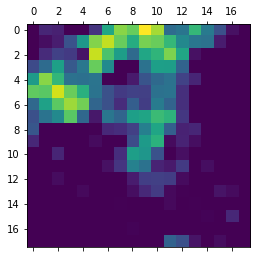

In [154]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [149]:
import cv2

#Das Bild wird eingelesen
img_res = cv2.imread(img_path)

# Groessenanpassung
heatmap = cv2.resize(heatmap, (img_res.shape[1], img_res.shape[0]))

# RGB
heatmap = np.uint8(255 * heatmap)

# Die heatmap wird auf das Bild übertragen
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

#"intens": Intensitaet der Heatmap
intens = 0.4
superimposed_img = heatmap * intens + img_res


In [150]:
#Heatmap wird gespeichert
add= "gs"
img_path_hm = os.path.join(base_dir, 'Prognose', 'Heatmaps', 'HM' + add + '.jpg')
cv2.imwrite(img_path_hm, superimposed_img)

True

GradCAM activation map of the __RGB__  and __Grayscale__ (collapsed) arms. Even though the quality of the activation is low, both pictures show clearly different activation intensities and patterns. 

gradCAM-Heatmap __RGB__:
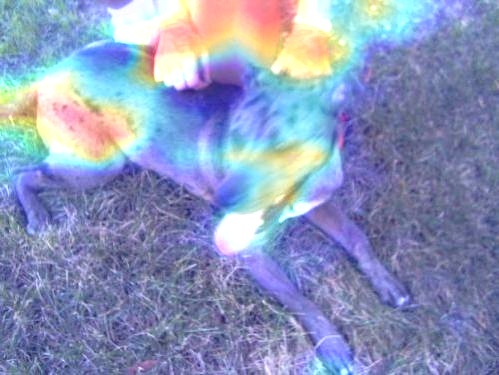
gradCAM-Heatmap __Grayscale__:
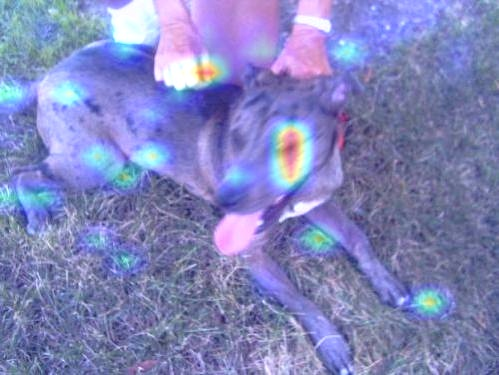